# Práctica 1: Uso de aplicaciones colaborativas para el uso de herramientas de inteligencia artificial

**Resultados de aprendizaje:** Identificar oportunidades para desarrollar y dirigir proyectos tecnológicos en campos específicos de la inteligencia artificial.

## Planteamiento de la actividad
Se deben realizar las siguientes actividades:

### Selección de una herramienta:
Se seleccionó Google Colab

### Definición del proyecto:
En muchas regiones del mundo, especialmente rurales y periurbanas, no existen sistemas automatizados para evaluar si el agua disponible es apta para el consumo humano. Esto puede representar un riesgo grave para la salud pública. El desafío es desarrollar una herramienta basada en datos que permita predecir, a partir de parámetros fisicoquímicos del agua, si esta es potable o no, facilitando decisiones rápidas para mitigar riesgos sanitarios.


### Objetivo:

El objetivo de este proyecto es analizar la calidad del agua con base en variables fisicoquímicas obtenidas de un conjunto de datos abierto, y desarrollar una herramienta preliminar de apoyo para clasificar su potabilidad. Para ello, se utiliza una plataforma colaborativa en la nube (Google Colab) y la biblioteca pandas para la manipulación de datos, junto con herramientas de visualización como matplotlib y seaborn.

Como parte del análisis exploratorio, se crean cuatro nuevas columnas derivadas de los datos originales:

- Una clasificación del pH (ácido, neutro o alcalino),
- Un índice de sales disueltas basado en la relación entre sólidos y conductividad,
- Un nivel de riesgo asociado a trihalometanos, y
- Una clasificación de calidad general del agua según criterios básicos ambientales.

Estas transformaciones permiten enriquecer el análisis de patrones y visualizar las condiciones que influyen en la potabilidad, promoviendo el uso de inteligencia artificial y ciencia de datos para la toma de decisiones ambientales en contextos de salud pública y sostenibilidad.

### Configuración del entorno para trabajo con GitHub + Google Colab + Google Drive

1. 📂 Crear el repositorio en GitHub


2. 📁 Montar Google Drive en Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. 🛠️ Clonar el repositorio en la carpeta de trabajo en drive

In [27]:
%cd /content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas

/content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas


**Solo se necesita hacer una vez**

In [28]:
#!git clone https://github.com/FreddyHVG/MIAA_practica1.git
#%cd practica01_MIAA_HIA

Cloning into 'MIAA_practica1'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.
/content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas/practica01_MIAA_HIA


4. ✅ Usar git add, commit y push desde Colab

**Cada vez que se hagcen cambios importantes, ejecutar:**

In [25]:
%cd /content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas/practica01_MIAA_HIA

/content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas/practica01_MIAA_HIA


In [26]:
!echo "git_push.ipynb" >> .gitignore
!git rm --cached git_push.ipynb
!git commit -m "Ignorar git_push.ipynb del repositorio"
!git push origin main

fatal: pathspec 'git_push.ipynb' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2bb3095e88da.(none)')
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


5. ✏️ Crear la estructura de carpetas del proyecto

In [3]:
import os

# Ruta real en tu Google Drive
base_dir = "/content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas/practica01_MIAA_HIA"
notebook_file = os.path.join(base_dir, "notebook.ipynb")
readme_file = os.path.join(base_dir, "README.md")
data_dir = os.path.join(base_dir, "data")

# Crear las carpetas y archivos
os.makedirs(data_dir, exist_ok=True)

# Crear README.md con contenido base
with open(readme_file, "w") as f:
    f.write("# Calidad del Agua y Potabilidad\n"
            "\n"
            "Este repositorio contiene el desarrollo de una práctica ambiental colaborativa\n"
            "que analiza la calidad del agua y su potabilidad usando herramientas de análisis de datos e IA.\n"
            "\n"
            "## Estructura del repositorio\n"
            "- `notebook.ipynb`: Desarrollo principal del análisis.\n"
            "- `data/`: Archivos de entrada (CSV, Excel, etc.)\n"
            "- `README.md`: Información general del proyecto.\n")

# Crear notebook vacío
with open(notebook_file, "w") as f:
    f.write("")

# Mostrar archivos generados
os.listdir(base_dir)

['.git',
 'data',
 'Práctica01.ipynb',
 'README.md',
 '.gitignore',
 'notebook.ipynb']

### Cargar el archivo CSV con pandas

Cargar el csv a la carpeta data del proyecto:

📁 /content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas/practica01_MIAA_HIA/data/

In [7]:
import pandas as pd

# Ruta al archivo CSV
file_path = "/content/drive/MyDrive/MIAA/Clases/Herramientas IA/Prácticas/practica01_MIAA_HIA/data/water_potability.csv"

# Cargar el archivo al DataFrame
df = pd.read_csv(file_path)

# Mostrar primeras filas
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Exploración inicial y manejo de valores faltantes

In [8]:
# Ver columnas, tipos de datos y resumen general
print("Información del DataFrame:")
print(df.info())

# Verificar valores faltantes por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con NaN
df = df.dropna().reset_index(drop=True)

# Confirmar que se eliminaron
print("\nDespués de eliminar NaN:")
print(df.isnull().sum())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Valores nulos por columna:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0

In [9]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
5,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
6,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
7,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
8,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
9,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0


### Crear las 4 columnas nuevas derivadas

Se agrega al DataFrame:

1. Clasificación de pH (ph_categoria)
2. Índice de sales disueltas (indice_sales)
3. Riesgo por trihalometanos (riesgo_thm)
4. Calidad general simplificada (calidad_simplificada)

✅ 1. ph_categoria

Categorización cualitativa del valor numérico de pH, que clasifica el agua en tres grupos:

- Ácido: pH < 6.5
- Neutro: 6.5 ≤ pH ≤ 8.5
- Alcalino: pH > 8.5

Permite identificar condiciones químicas del agua. El pH influye en la corrosión, toxicidad de metales y la efectividad de la desinfección. Se usa para análisis de riesgos y cumplimiento de normas (como las de la OMS).

✅ 2. indice_sales

Un índice calculado como:

Índice de sales = Sólidos totales disueltos / Conductividad

Estima la concentración relativa de sales en función de la conductividad eléctrica del agua. Puede indicar mineralización excesiva o la presencia de contaminantes disueltos.

✅ 3. riesgo_thm

Una clasificación de riesgo basada en la concentración de trihalometanos (compuestos que se generan al clorar agua):

Bajo: ≤ 50 µg/L

Moderado: 51–80 µg/L

Alto: > 80 µg/L

Ayuda a evaluar el riesgo para la salud, ya que niveles altos de trihalometanos están relacionados con efectos adversos como problemas hepáticos o cancerígenos en exposiciones prolongadas.

✅ 4. calidad_simplificada

Una clasificación binaria general del agua como:

- Aceptable: cumple con rangos saludables para pH, turbidez, trihalometanos y cloraminas.
- No aceptable: falla en alguno de los parámetros clave.

Sirve como indicador integral rápido de calidad del agua según múltiples parámetros fisicoquímicos. Es útil como referencia preliminar para consumo humano.

In [10]:
# 1. Clasificación de pH
def clasificar_ph(valor):
    if valor < 6.5:
        return 'Ácido'
    elif valor > 8.5:
        return 'Alcalino'
    else:
        return 'Neutro'

df['ph_categoria'] = df['ph'].apply(clasificar_ph)

# 2. Índice de sales disueltas
df['indice_sales'] = df['Solids'] / df['Conductivity']

# 3. Riesgo por trihalometanos
df['riesgo_thm'] = df['Trihalomethanes'].apply(
    lambda x: 'Alto' if x > 80 else 'Moderado' if x > 50 else 'Bajo'
)

# 4. Clasificación general de calidad
def clasificar_calidad(row):
    if (6.5 <= row['ph'] <= 8.5 and
        row['Turbidity'] < 4 and
        row['Trihalomethanes'] < 80 and
        row['Chloramines'] < 8):
        return 'Aceptable'
    else:
        return 'No aceptable'

df['calidad_simplificada'] = df.apply(clasificar_calidad, axis=1)

# Verificar que se agregaron correctamente
df[['ph', 'ph_categoria', 'indice_sales', 'riesgo_thm', 'calidad_simplificada']].head()

,ph,ph_categoria,indice_sales,riesgo_thm,calidad_simplificada
0,8.316766,Neutro,60.612296,Alto,No aceptable
1,9.092223,Alcalino,45.126753,Bajo,No aceptable
2,5.584087,Ácido,102.502590,Moderado,No aceptable
3,10.223862,Alcalino,101.355724,Alto,No aceptable
4,8.635849,Alcalino,28.807146,Moderado,No aceptable


### Estadísticos descriptivos

**Estadísticos generales**

In [11]:
# Estadísticos descriptivos para todas las variables numéricas
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,indice_sales
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282,53.302756
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678,23.931412
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000,0.888787
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000,35.929309
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000,49.925672
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000,65.522256
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000,162.284515


**Estadísticos por grupos**

In [12]:
# Estadísticos agrupados por la variable objetivo (Potability)
# Filtrar solo columnas numéricas
numericas = df.select_dtypes(include='number').columns

# Agrupar por Potability y calcular estadísticas descriptivas
df[numericas].groupby(df['Potability']).agg(['mean', 'std', 'min', 'max']).T # .T para la transpuesta ademas en lugar de agg puede ser .describe()

Potability                       0             1
ph              mean      7.067201      7.113791
                std       1.659106      1.437623
                min       1.431782      0.227499
                max      14.000000     11.898078
Hardness        mean    196.008440    195.908341
                std      30.717642     35.301146
                min      98.452931     73.492234
                max     300.292476    317.338124
Solids          mean  21628.535122  22344.922883
                std    8461.108693   8891.547966
                min     320.942611   1198.943699
                max   55334.702799  56488.672413
Chloramines     mean      7.107267      7.174395
                std       1.476577      1.732796
                min       2.456014      1.390871
                max      12.653362     13.127000
Sulfate         mean    333.742928    332.457832
                std      36.398403     47.446190
                min     203.444521    129.000000
                max     460.107069    481.030642
Conductivity    mean    427.554342    425.005423
                std      79.882677     81.950982
                min     210.319182    201.619737
                max     753.342620    695.369528
Organic_carbon  mean     14.400250     14.294764
                std       3.370196      3.257917
                min       4.371899      2.200000
                max      27.006707     23.604298
Trihalomethanes mean     66.278712     66.581596
                std      15.931953     16.297713
                min      14.343161      8.577013
                max     120.030077    124.000000
Turbidity       mean      3.955181      3.991254
                std       0.782984      0.776408
                min       1.450000      1.492207
                max       6.494749      6.494249
Potability      mean      0.000000      1.000000
                std       0.000000      0.000000
                min       0.000000      1.000000
                max       0.000000      1.000000
indice_sales    mean     52.496848     54.495221
                std      23.642805     24.317850
                min       0.888787      2.179424
                max     162.284515    146.160019

### Visualización de datos

In [13]:
# Crear una copia con etiquetas descriptivas para graficar
df_grafico = df.copy()
df_grafico['Potabilidad'] = df_grafico['Potability'].map({0: 'No potable', 1: 'Potable'})

**Gráfico 1: Distribución de potabilidad según categoría de pH**

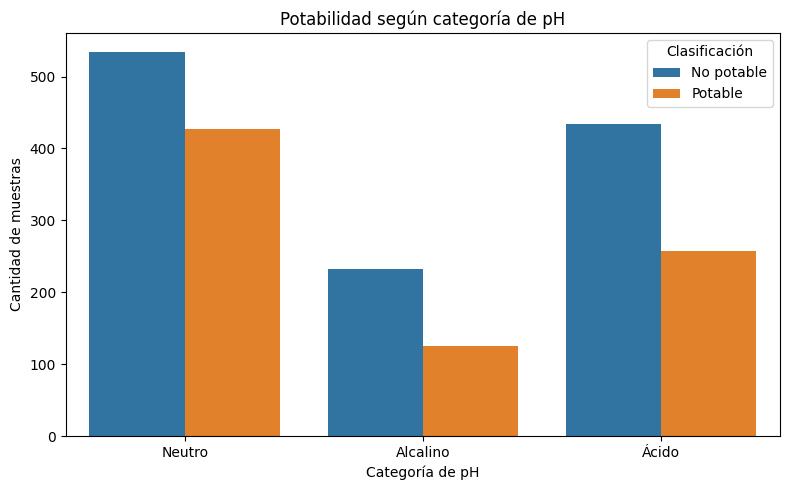

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_grafico, x='ph_categoria', hue='Potabilidad')
plt.title('Potabilidad según categoría de pH')
plt.xlabel('Categoría de pH')
plt.ylabel('Cantidad de muestras')
plt.legend(title='Clasificación')
plt.tight_layout()
plt.show()

**Hallazgos:**

El gráfico muestra la distribución de muestras de agua según su categoría de pH (ácido, neutro o alcalino) y su potabilidad. Se observa que la mayor parte del agua clasificada como potable se concentra en la categoría neutra, lo cual es coherente con los estándares internacionales de calidad para el consumo humano. Por el contrario, las muestras ácidas y alcalinas presentan una mayor proporción de no potabilidad, lo que indica que extremos en el pH pueden estar asociados con condiciones inadecuadas para el consumo. Este resultado resalta la importancia de mantener el pH dentro de un rango neutro (aproximadamente entre 6.5 y 8.5) como uno de los criterios fundamentales para asegurar la calidad del agua.

**Gráfico 2: Matriz de correlación entre variables numéricas**

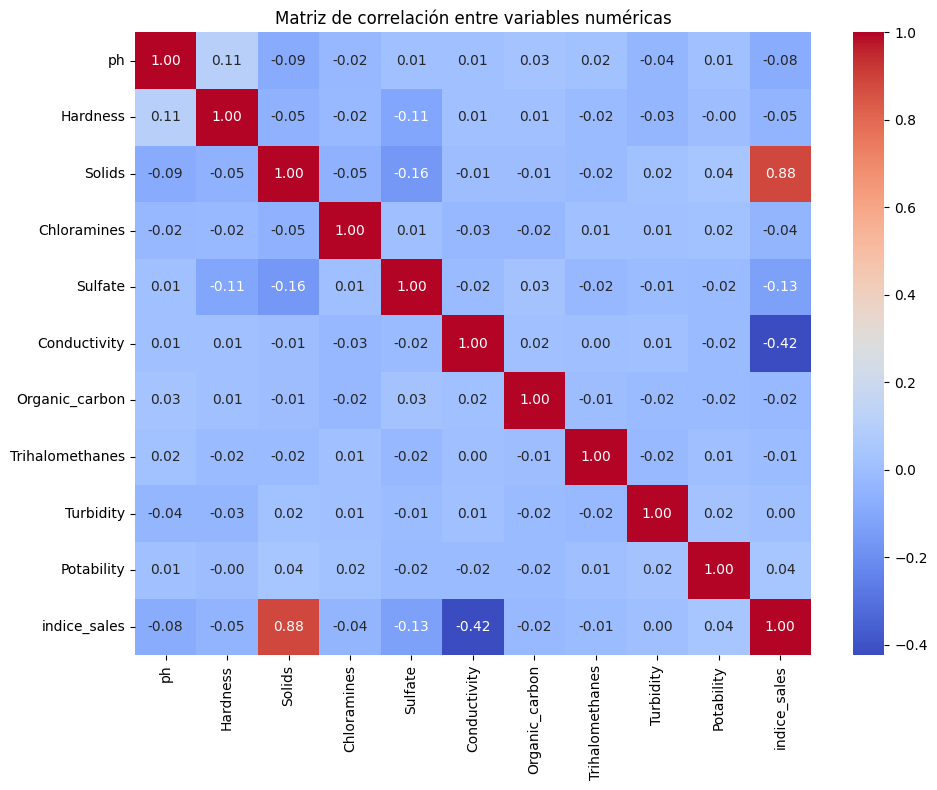

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

**Hallazgos**

La matriz de correlación muestra la relación lineal entre las variables numéricas del conjunto de datos. En general, se observa una baja correlación entre la mayoría de los parámetros, lo cual indica que cada uno aporta información diferente sobre la calidad del agua. La correlación más alta es entre Solids e índice_sales (0.88), lo cual es esperable ya que este índice fue calculado a partir de los sólidos totales disueltos. También se identifica una correlación negativa moderada entre indice_sales y Conductivity (-0.42), reflejando su relación inversa en la fórmula del índice. Por otro lado, la variable Potability muestra correlaciones muy débiles (cercanas a cero) con todos los parámetros, lo cual sugiere que no existe una única variable que determine la potabilidad, sino que esta depende de la interacción de varios factores.

### Modelo con Random Forest + escalado

In [16]:
df['Potability'].value_counts()

,count
Potability,
0,1200
1,811


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Seleccionar variables predictoras y objetivo
X = df.drop(columns=['Potability', 'ph_categoria', 'riesgo_thm', 'calidad_simplificada'])
y = df['Potability']

# 2. Escalar los datos (aunque Random Forest no lo necesita, puede servir para comparación futura)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 5. Predecir y evaluar
y_pred_rf = rf_model.predict(X_test)

print("Matriz de confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))


Matriz de confusión (Random Forest):
[[308  47]
 [151  98]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       355
           1       0.68      0.39      0.50       249

    accuracy                           0.67       604
   macro avg       0.67      0.63      0.63       604
weighted avg       0.67      0.67      0.65       604



**Hallazgos**

El modelo de Random Forest alcanzó una exactitud del 67%, demostrando un rendimiento adecuado para la clasificación de la potabilidad del agua en función de variables fisicoquímicas. La matriz de confusión muestra que el modelo identificó correctamente 308 muestras no potables y 98 potables, con un recall del 39% para la clase potable, lo que indica una capacidad moderada para detectar casos positivos. El f1-score de 0.50 para esta clase sugiere un equilibrio razonable entre precisión y sensibilidad. Estos resultados reflejan que el modelo logra capturar patrones relevantes en los datos, incluso con un leve desbalance entre clases. La capacidad del algoritmo para manejar múltiples variables y relaciones no lineales lo convierte en una herramienta útil para apoyar la toma de decisiones en el monitoreo de la calidad del agua.

**Hallazgos**



### Importancia de las variables

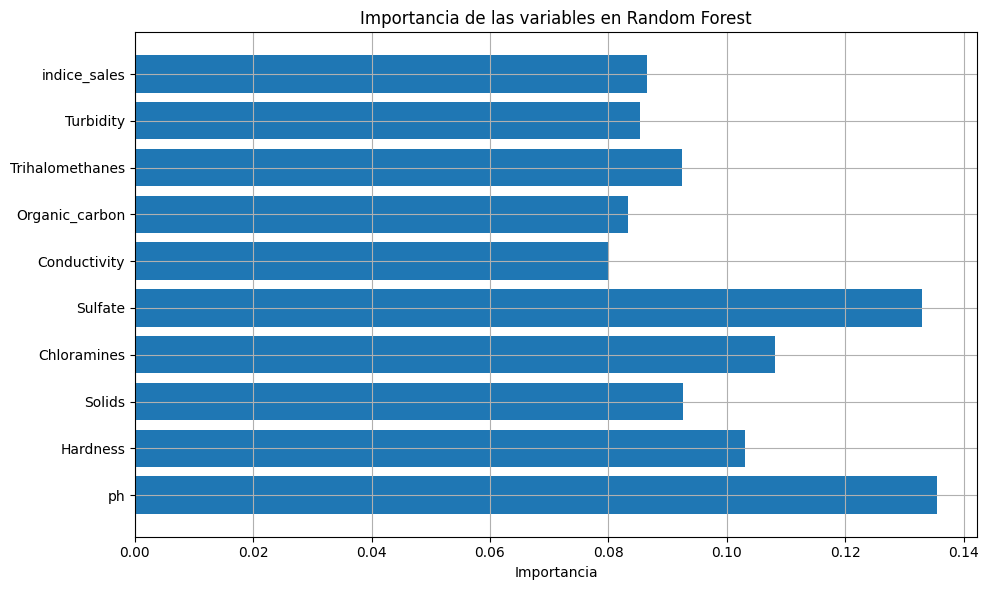

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener importancias
importancias = rf_model.feature_importances_
features = X.columns

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(features, importancias)
plt.xlabel('Importancia')
plt.title('Importancia de las variables en Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

**Hallazgos**

El gráfico de importancia de variables muestra cuáles son los parámetros fisicoquímicos que más influyen en la predicción de la potabilidad del agua según el modelo Random Forest. Destacan el pH y el sulfato como las variables con mayor peso predictivo, lo que sugiere que estos factores tienen una alta correlación con la condición de que el agua sea apta o no para el consumo humano. Le siguen en importancia las cloraminas, la dureza y los sólidos totales disueltos, todos ellos parámetros relevantes en normativas de calidad del agua. En cambio, variables como la conductividad, el carbono orgánico y el índice de sales presentan un menor grado de influencia, aunque siguen aportando valor al modelo. Estos resultados permiten priorizar ciertos indicadores en programas de monitoreo, apoyando una gestión más eficiente de la calidad del recurso hídrico.

### Gráfico de residuos (Clasificación)

Aunque la regresión logística usa residuos clásicos, en clasificación podemos analizar el error entre la probabilidad predicha y la etiqueta real (y_test), lo cual se interpreta como un residuo

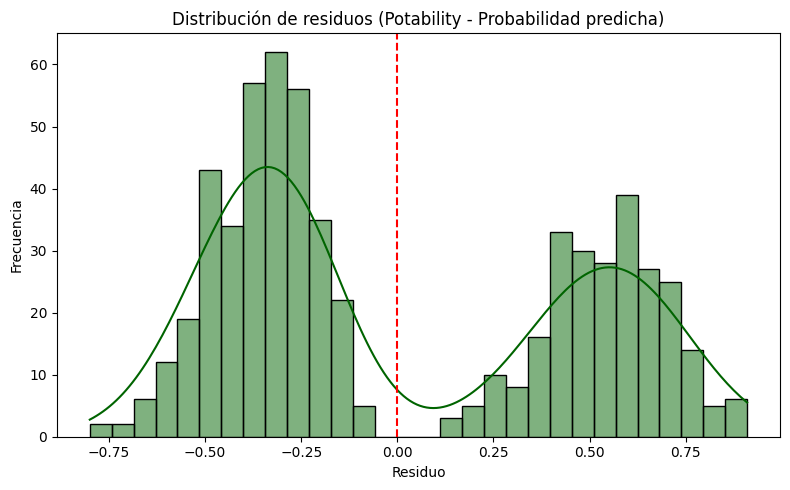

In [19]:
# Probabilidades predichas para la clase 1
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Residuos = etiqueta real - probabilidad predicha
residuos_rf = y_test - y_proba_rf

# Gráfico de residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuos_rf, bins=30, kde=True, color='darkgreen')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribución de residuos (Potability - Probabilidad predicha)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

**Hallazgos**

La distribución de residuos, calculada como la diferencia entre la etiqueta real de potabilidad y la probabilidad predicha por el modelo, muestra una asimetría moderada con dos acumulaciones principales a ambos lados del valor cero. La presencia de un grupo amplio de residuos negativos (con centro cerca de -0.3) indica que el modelo tiende a sobreestimar la probabilidad de potabilidad en algunas muestras no potables. Por otro lado, los residuos positivos (centrados alrededor de 0.5) reflejan subestimación en muestras que sí eran potables. Esta dispersión en los residuos sugiere que, aunque el modelo Random Forest ha captado patrones relevantes, aún existe variabilidad no explicada que podría mejorarse con un mayor ajuste, un conjunto de datos más balanceado o más variables de entrada. En general, el comportamiento de los residuos confirma que el modelo no está sobreajustado, pero sí presenta indicios de errores sistemáticos en ambas clases.